Comparativa de uso de recursos:


,Métrica,Docker,VM
0,CPU reposo (%),4.50,10.80
1,CPU carga (%),2.90,10.20
2,RAM usada (GB),9.98,1.57
3,RAM total (GB),15.25,11.40
4,RAM (%),65.50,16.50
5,Disco usado (GB),895.27,15.94
6,Disco total (GB),926.47,19.02
7,Disco libre (GB),31.20,2.09


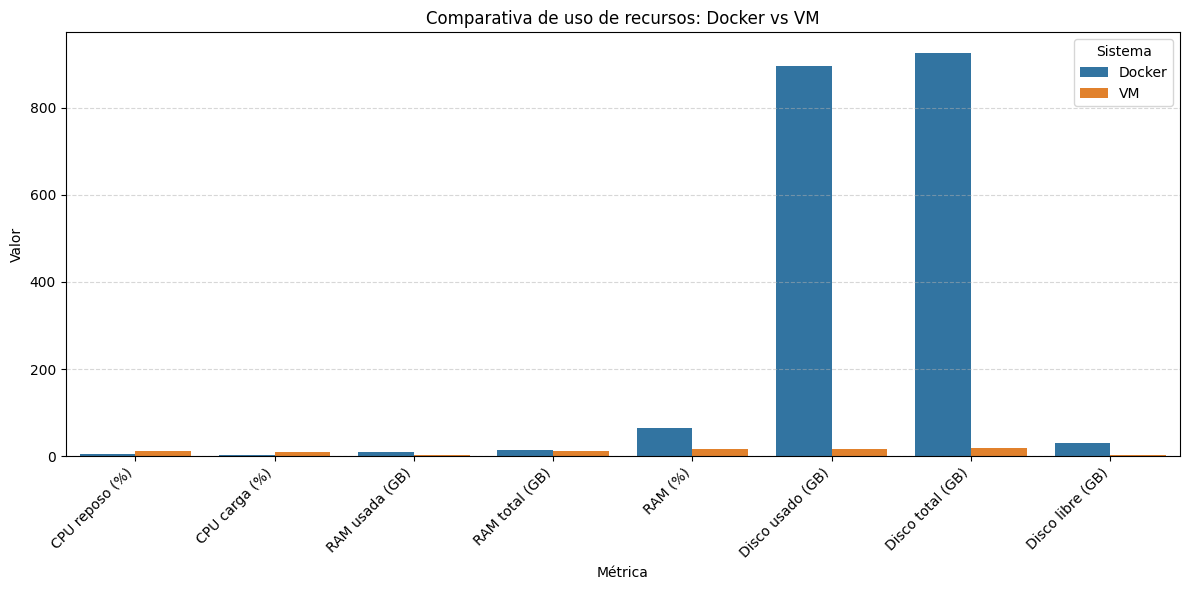

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Datos comparativos
data = {
    'Métrica': [
        'CPU reposo (%)', 'CPU carga (%)',
        'RAM usada (GB)', 'RAM total (GB)', 'RAM (%)',
        'Disco usado (GB)', 'Disco total (GB)', 'Disco libre (GB)'
    ],
    'Docker': [4.50, 2.90, 9.98, 15.25, 65.50, 895.27, 926.47, 31.20],
    'VM':     [10.80, 10.20, 1.57, 11.40, 16.50, 15.94, 19.02, 2.09]
}


df = pd.DataFrame(data)

# Tabla
print("Comparativa de uso de recursos:")
display(df)

# Gráfica de barras
plt.figure(figsize=(12, 6))
df_melt = df.melt(id_vars="Métrica", var_name="Sistema", value_name="Valor")

sns.barplot(data=df_melt, x='Métrica', y='Valor', hue='Sistema')
plt.title("Comparativa de uso de recursos: Docker vs VM")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


Tiempo total de inicio (Docker vs VM):


,Sistema,Tiempo de inicio (s)
0,Docker,10.27
1,VM,45.34


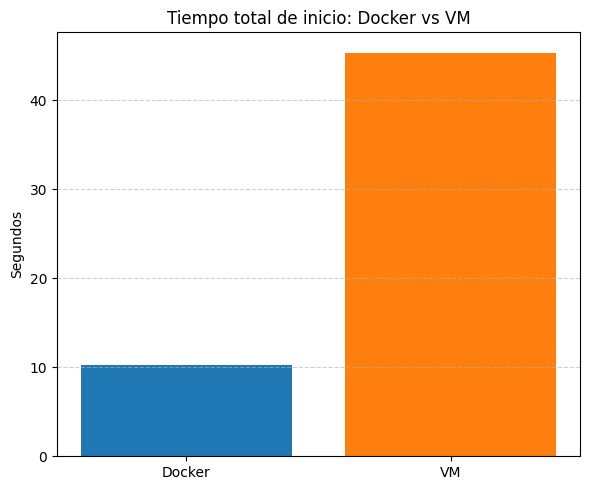

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Datos: tiempo total de inicio
tiempos = {
    "Docker": 10.27,   # 0.27 + 6 + 4
    "VM": 45.34        # Solo tiempo systemd total
}

# Crear DataFrame
df = pd.DataFrame(list(tiempos.items()), columns=["Sistema", "Tiempo de inicio (s)"])

# Tabla
print("Tiempo total de inicio (Docker vs VM):")
display(df)

# Crear gráfica
plt.figure(figsize=(6, 5))
plt.bar(df["Sistema"], df["Tiempo de inicio (s)"], color=["#1f77b4", "#ff7f0e"])
plt.title("Tiempo total de inicio: Docker vs VM")
plt.ylabel("Segundos")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


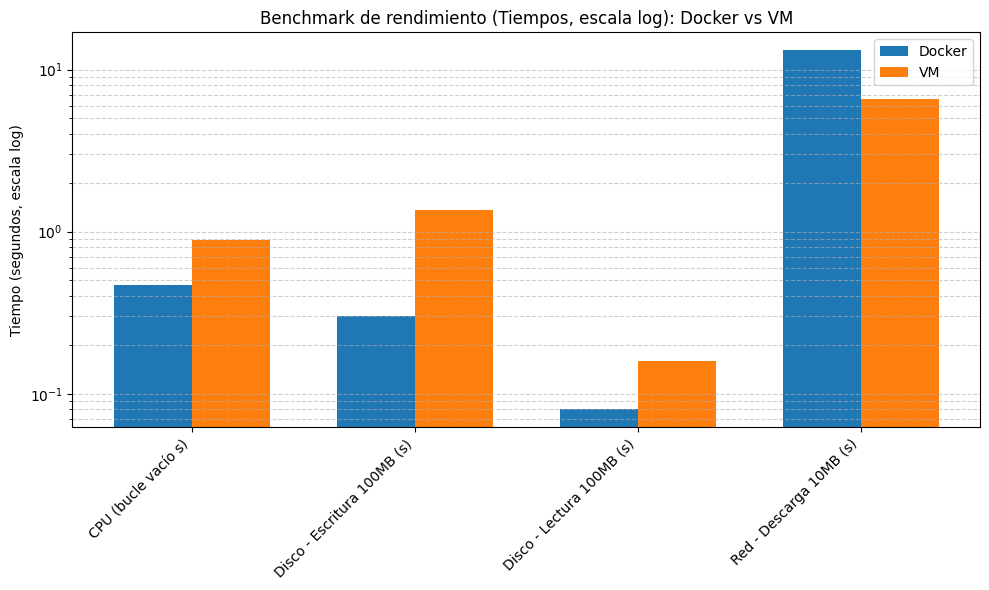

In [17]:
# Usando df_tiempos del código anterior

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, df_tiempos["Docker"], width, label='Docker', color="#1f77b4")
bars2 = ax.bar(x + width/2, df_tiempos["VM"], width, label='VM', color="#ff7f0e")

ax.set_yscale('log')
ax.set_ylabel('Tiempo (segundos, escala log)')
ax.set_title('Benchmark de rendimiento (Tiempos, escala log): Docker vs VM')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha="right")
ax.legend()
ax.grid(axis='y', which='both', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


Caso de uso: EmuladorJS en ejecución - Uso y tiempos

        CPU (%)  RAM usada (%)  Tiempo de respuesta (s)
Docker      6.8           73.7                     0.02
VM         29.8           18.3                     0.05


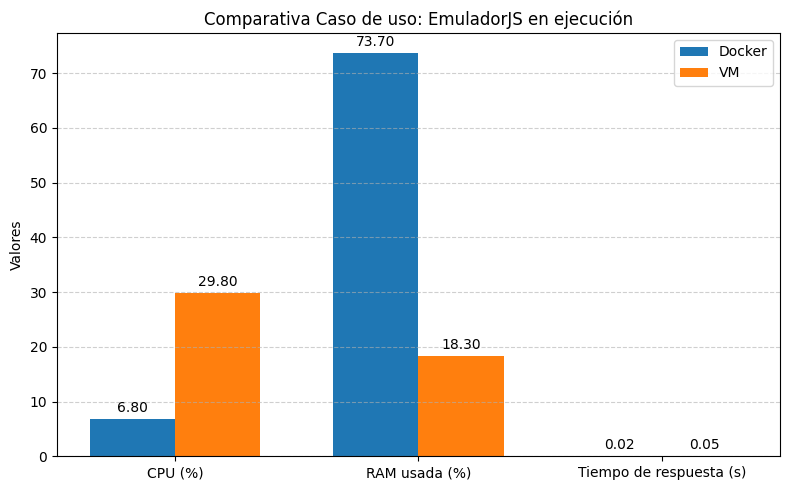

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Datos
data = {
    "CPU (%)": [6.8, 29.8],
    "RAM usada (%)": [73.7, 18.3],
    "Tiempo de respuesta (s)": [0.02, 0.05]
}

df = pd.DataFrame(data, index=["Docker", "VM"])

# Mostrar tabla simple
print("Caso de uso: EmuladorJS en ejecución - Uso y tiempos\n")
print(df)

# Gráfico de barras agrupadas
labels = df.columns
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))

bars1 = ax.bar(x - width/2, df.loc["Docker"], width, label='Docker', color="#1f77b4")
bars2 = ax.bar(x + width/2, df.loc["VM"], width, label='VM', color="#ff7f0e")

ax.set_ylabel('Valores')
ax.set_title('Comparativa Caso de uso: EmuladorJS en ejecución')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.6)

# Añadir etiquetas de valor encima de las barras
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bars1)
autolabel(bars2)

plt.tight_layout()
plt.show()
